In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [ ]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

lenet = models.Sequential([
    layers.Conv2D(6, kernel_size=5, strides=1, activation='relu', input_shape=(32,32,3), padding='same'), #C1
    layers.AveragePooling2D(pool_size=(2, 2)), #S1
    layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    layers.AveragePooling2D(pool_size=(2, 2)), #S2
    layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    layers.Flatten(), #Flatten
    layers.Dense(84, activation='relu'), #F1
    layers.Dense(10, activation='softmax') #Output layer
])


In [ ]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 16, 16, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

In [ ]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 14s 6ms/step - loss: 1.6344 - accuracy: 0.4072 - val_loss: 1.3989 - val_accuracy: 0.4972
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3263 - accuracy: 0.5271 - val_loss: 1.2305 - val_accuracy: 0.5592
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1881 - accuracy: 0.5779 - val_loss: 1.2515 - val_accuracy: 0.5589
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1065 - accuracy: 0.6075 - val_loss: 1.1378 - val_accuracy: 0.6011
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0338 - accuracy: 0.6352 - val_loss: 1.1170 - val_accuracy: 0.6106
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9818 - accuracy: 0.6535 - val_loss: 1.0541 - val_accuracy: 0.6289
Epoch 7/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9301 - accuracy: 0.6720 - val_loss: 1.0452 - val_a

In [ ]:
import numpy as np


In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

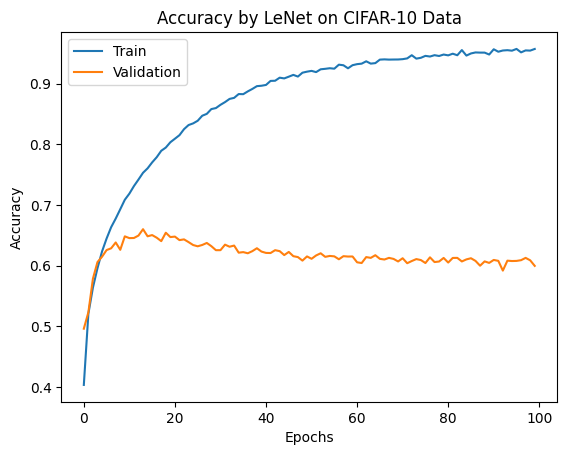

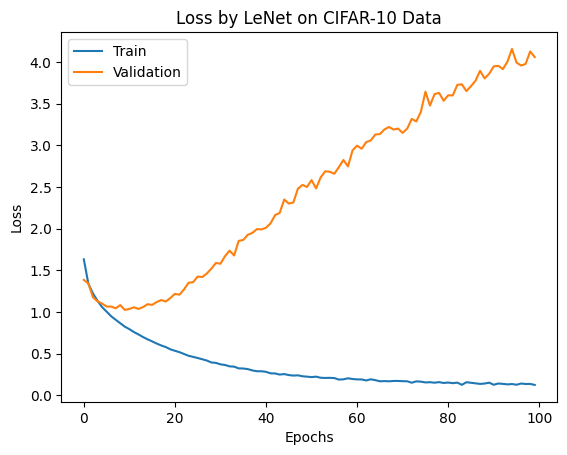

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[619,  15,  91,  40,  22,  14,  21,  11, 113,  54],
       [ 23, 731,  21,  16,   6,  12,  19,   5,  48, 119],
       [ 57,   6, 531,  97,  86,  87,  71,  30,  21,  14],
       [ 27,  12, 106, 439,  65, 179,  92,  32,  17,  31],
       [ 33,   3, 143,  95, 493,  73,  66,  64,  22,   8],
       [ 13,   8, 131, 211,  67, 453,  41,  50,  11,  15],
       [  8,   3,  92, 106,  48,  36, 666,  17,   9,  15],
       [ 19,   6,  50,  73, 110,  78,  17, 613,   6,  28],
       [ 80,  30,  30,  27,  19,   6,  21,   4, 748,  35],
       [ 43,  90,  34,  31,   7,  14,  18,  14,  47, 702]])

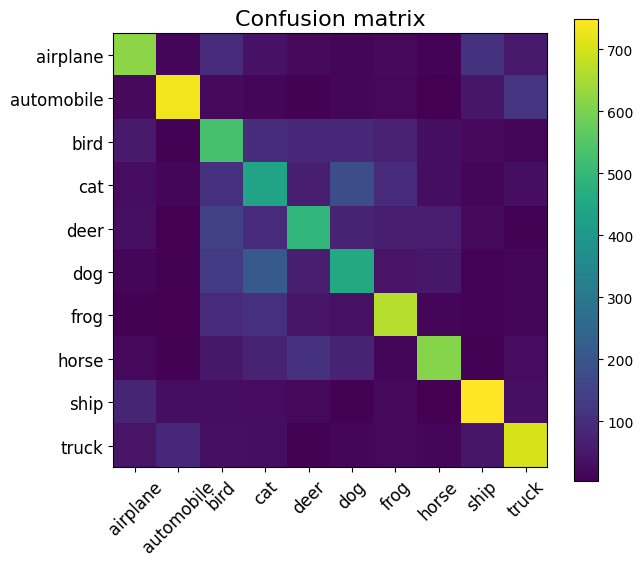

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()



In [ ]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.5995


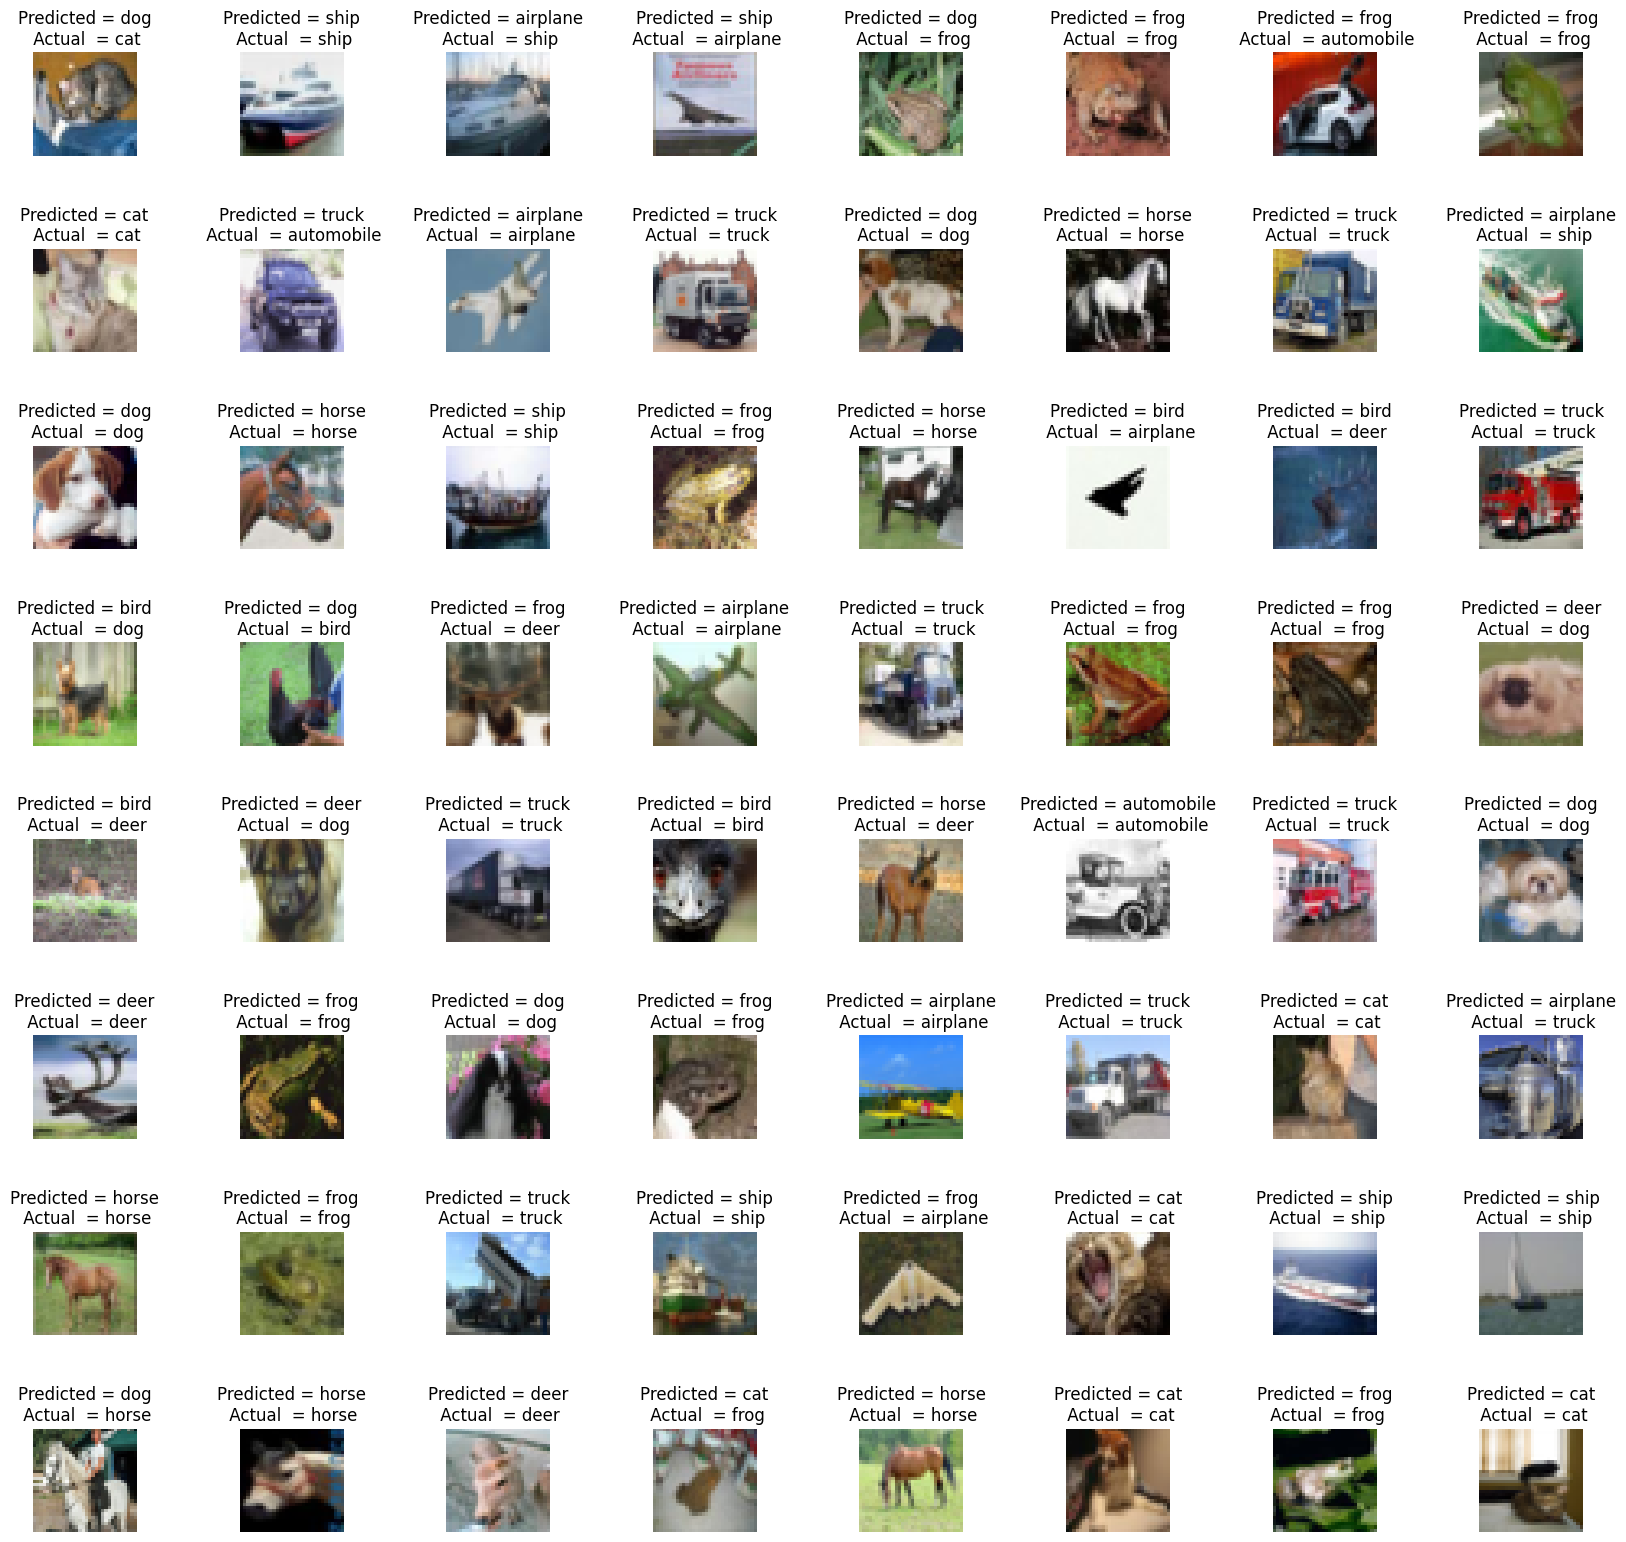

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPooling2D


In [ ]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 16)          0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 60)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 60)          32460     
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 30)         

In [ ]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 13s 6ms/step - loss: 2.3005 - accuracy: 0.1202 - val_loss: 2.2954 - val_accuracy: 0.1593
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2379 - accuracy: 0.1729 - val_loss: 2.0964 - val_accuracy: 0.2019
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0718 - accuracy: 0.2052 - val_loss: 2.0534 - val_accuracy: 0.2278
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9807 - accuracy: 0.2478 - val_loss: 2.0285 - val_accuracy: 0.2387
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8673 - accuracy: 0.2863 - val_loss: 1.7604 - val_accuracy: 0.3378
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7570 - accuracy: 0.3271 - val_loss: 1.7866 - val_accuracy: 0.3321
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6764 - accuracy: 0.3639 - val_loss: 1.6310 - val_

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[636,  32,  69,  48,  32,  13,   9,  41,  66,  54],
       [ 57, 585,  10,  28,   8,  11,  15,  31,  50, 205],
       [ 90,   4, 381, 106, 169,  71,  70,  66,  21,  22],
       [ 33,  16,  73, 449,  75, 202,  70,  53,  10,  19],
       [ 32,   8,  93,  83, 519,  59,  82, 105,  12,   7],
       [ 14,   6,  64, 257,  75, 429,  40,  95,   4,  16],
       [  7,  12,  78, 136, 146,  53, 515,  16,  11,  26],
       [ 31,  14,  54,  65, 107,  82,  17, 582,   6,  42],
       [147,  52,  26,  42,  30,  15,  13,   9, 617,  49],
       [ 65, 124,  24,  37,   9,  16,  12,  62,  37, 614]])

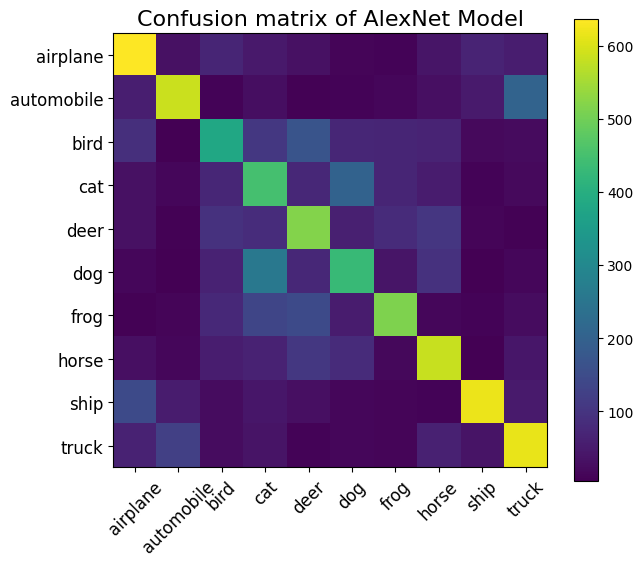

In [ ]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.5995


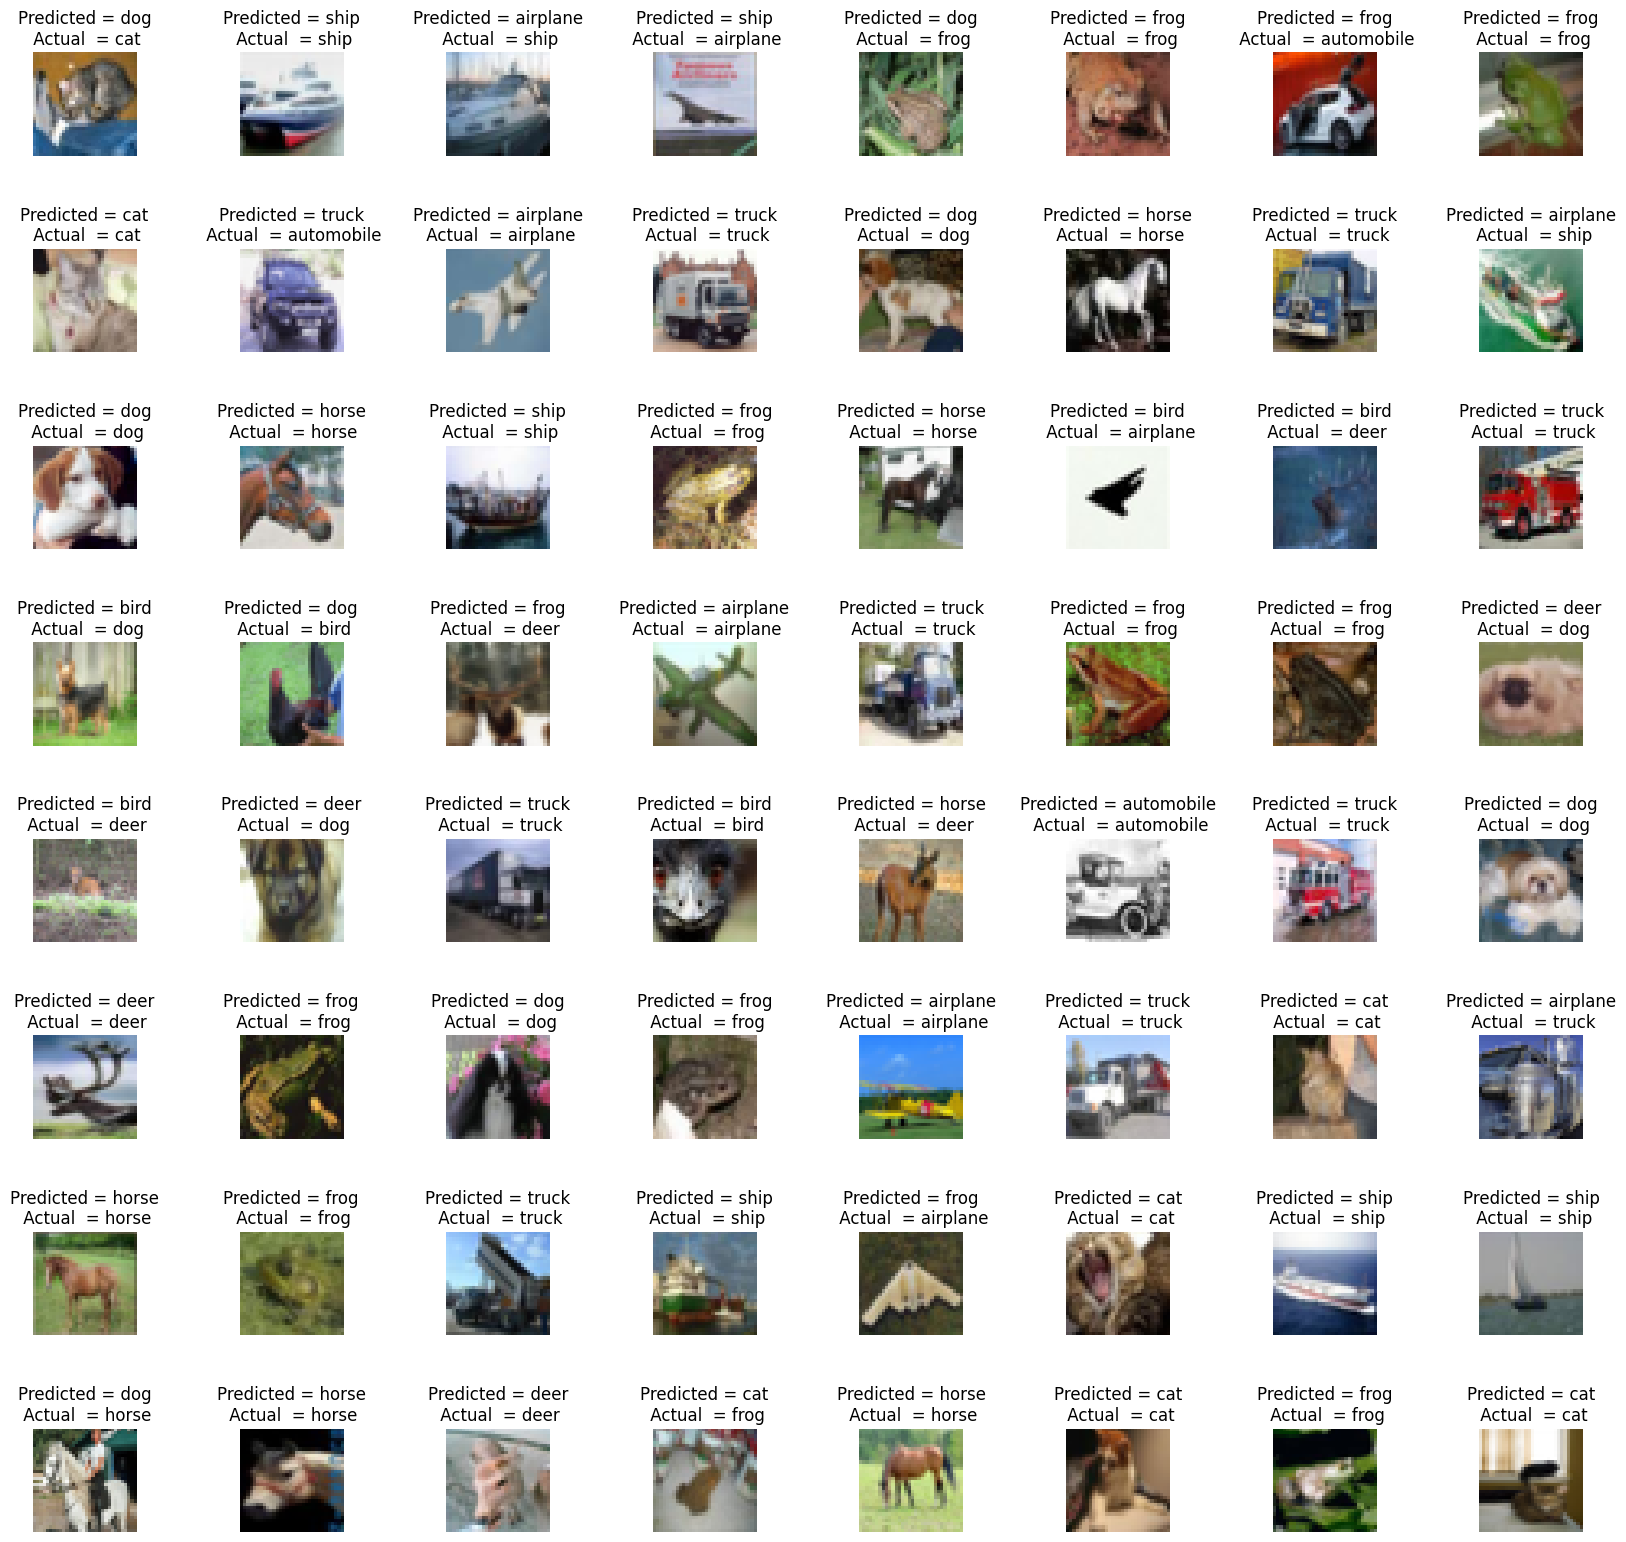

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

3.VGG 16

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [ ]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.0003)

In [ ]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


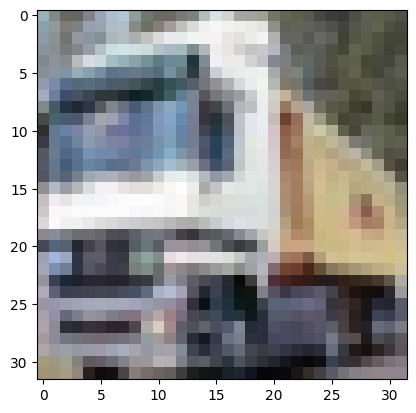

In [ ]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [ ]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# check model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [ ]:
# train
model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=10)

Epoch 1/10
391/391 [==============================] - 36s 68ms/step - loss: 2.3356 - accuracy: 0.0983
Epoch 2/10
391/391 [==============================] - 23s 59ms/step - loss: 2.3027 - accuracy: 0.0959
Epoch 3/10
391/391 [==============================] - 23s 58ms/step - loss: 2.3027 - accuracy: 0.0961
Epoch 4/10
391/391 [==============================] - 23s 59ms/step - loss: 2.3027 - accuracy: 0.0975
Epoch 5/10
391/391 [==============================] - 23s 59ms/step - loss: 2.3027 - accuracy: 0.0969
Epoch 6/10
391/391 [==============================] - 23s 59ms/step - loss: 2.3027 - accuracy: 0.0957
Epoch 7/10
391/391 [==============================] - 23s 58ms/step - loss: 2.3027 - accuracy: 0.0967
Epoch 8/10
391/391 [==============================] - 23s 59ms/step - loss: 2.3027 - accuracy: 0.0959
Epoch 9/10
391/391 [==============================] - 23s 59ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 10/10
391/391 [==============================] - 23s 59ms/step - loss: 2.302

In [ ]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 7s 162ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025965690612793, 0.10000000149011612]

1/1 [==============================] - 1s 640ms/step
predict class: 9
expected class: 5


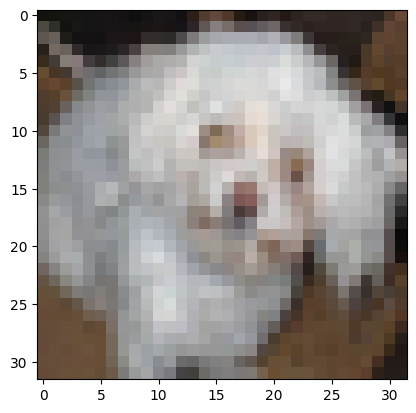

In [ ]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [ ]:
# save model
model.save("keras-VGG16-cifar10.h5")

4.VGG19Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

%matplotlib inline

Extract data and train and test dataset

In [ ]:
cifar100 = tf.keras.datasets.cifar100
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train = X_train / 255.0
# X_test = X_test / 255.0

let's look into the dataset images

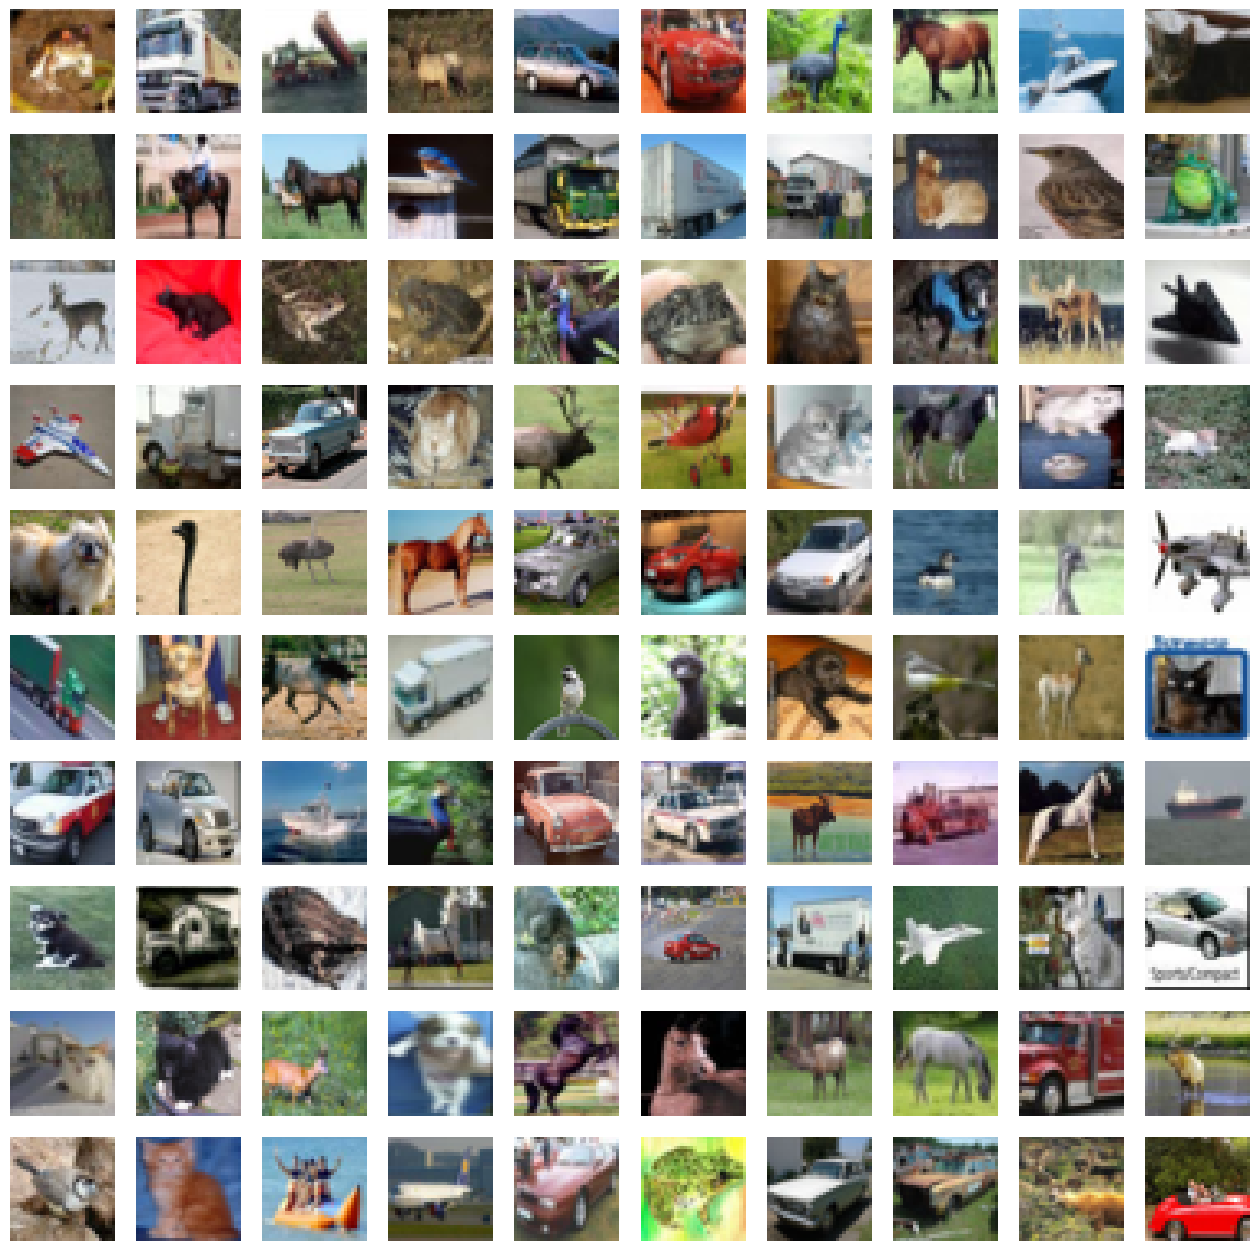

In [ ]:
plt.figure(figsize = (16,16))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

Training , Validating and Splitting trained and tested data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train,test_size=0.2)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True
)
train_datagen.fit(x_train)

val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input)
val_datagen.fit(x_val)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

We have used only 16 layers out of 19 layers in the CNN

In [ ]:
vgg_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
)

vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = tf.keras.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 1024)              525312    
                                                                 
 dense_11 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_12 (Dense)            (None, 256)               262400    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 21864266 (83.41 MB)
Trainable params: 21

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 128),
    validation_data = val_datagen.flow(x_val,y_val, batch_size = 128),
    epochs = 10,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

313/313 [==============================] - 38s 112ms/step - loss: 1.1032 - accuracy: 0.6178 - val_loss: 0.7488 - val_accuracy: 0.7486 - lr: 0.0010
Epoch 2/10
313/313 [==============================] - 34s 107ms/step - loss: 0.7297 - accuracy: 0.7541 - val_loss: 0.6326 - val_accuracy: 0.7842 - lr: 0.0010
Epoch 3/10
313/313 [==============================] - 34s 107ms/step - loss: 0.6273 - accuracy: 0.7884 - val_loss: 0.6150 - val_accuracy: 0.7950 - lr: 0.0010
Epoch 4/10
313/313 [==============================] - 34s 107ms/step - loss: 0.5704 - accuracy: 0.8069 - val_loss: 0.5969 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 5/10
313/313 [==============================] - 34s 108ms/step - loss: 0.5160 - accuracy: 0.8231 - val_loss: 0.5143 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 6/10
313/313 [==============================] - 34s 109ms/step - loss: 0.4794 - accuracy: 0.8351 - val_loss: 0.5276 - val_accuracy: 0.8218 - lr: 0.0010
Epoch 7/10
313/313 [==============================] - 35s 112ms

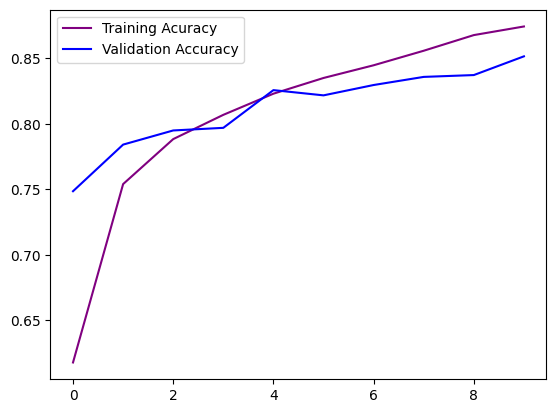

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

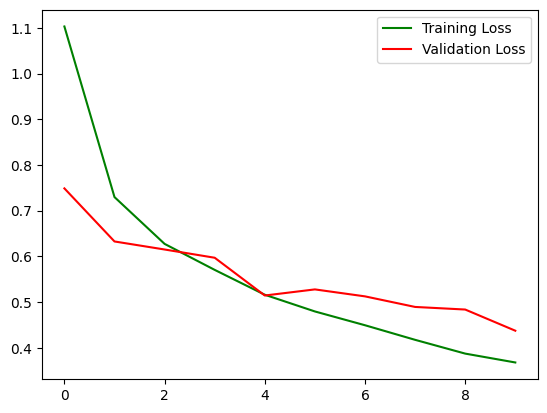

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [ ]:
x_test = tf.keras.applications.vgg19.preprocess_input(X_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred[:10]

313/313 [==============================] - 3s 9ms/step


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[892,   4,  19,   5,  10,   2,   2,  12,  36,  18],
       [ 12, 885,   1,   1,   0,   2,   3,   2,  11,  83],
       [ 35,   1, 826,  19,  48,  19,  35,   9,   5,   3],
       [  5,   3,  36, 700,  32, 145,  39,  19,   6,  15],
       [ 12,   1,  37,  27, 834,  15,  29,  40,   4,   1],
       [  3,   1,  28, 105,  22, 793,  11,  34,   1,   2],
       [ 10,   2,  28,  38,  15,  11, 884,   1,   7,   4],
       [  5,   0,  13,  21,  25,  30,   1, 898,   2,   5],
       [ 29,  15,   5,   1,   3,   1,   0,   0, 923,  23],
       [ 15,  16,   3,  15,   1,   1,   1,   7,  12, 929]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Testing Accuarcy : ', accuracy_score(Y_test, y_pred))

Testing Accuarcy :  0.8564


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


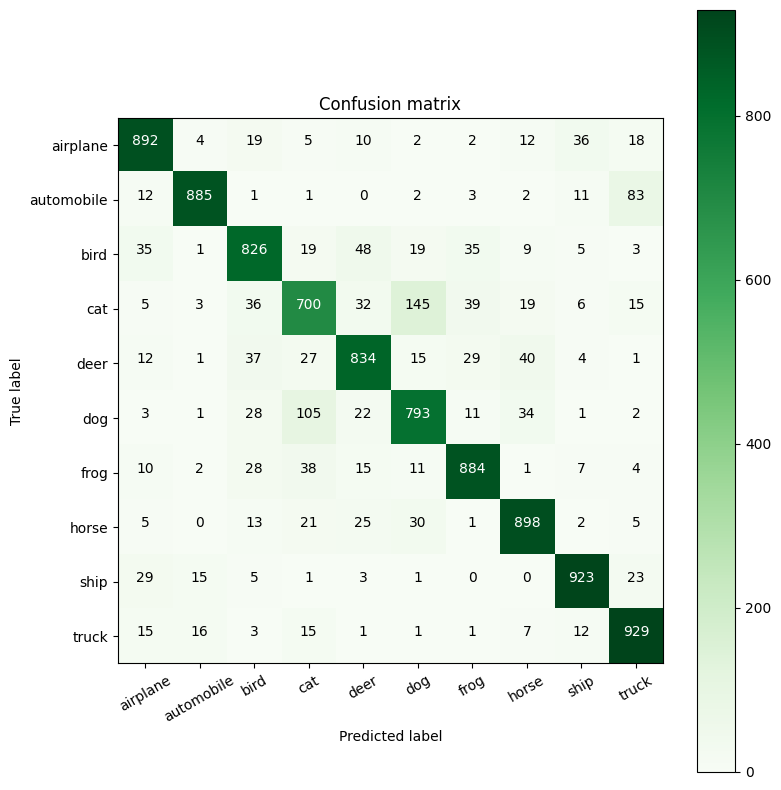

In [ ]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm,classes)